# Import Libraries

In [1]:
# Import core libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations

# Import visualization libraries
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns  # For enhanced data visualization

# Load the Dataset

In [4]:
# Load the dataset
dataset_path = r"C:\Users\DELL\OneDrive\Desktop1\Data Analyst Tasks - Cognifyz Technologies\Level - 3\Dataset .csv"
data = pd.read_csv(dataset_path)

# Analyze the Text Reviews to Identify the Most Common Positive and Negative Keywords

In [5]:
! pip install wordcloud

In [6]:
from collections import Counter
from wordcloud import WordCloud
import re

# Combine all reviews into a single string
all_reviews = ' '.join(data['Rating text'].dropna())

# Clean the text (remove punctuation and lowercase the text)
cleaned_reviews = re.sub(r'[^a-zA-Z\s]', '', all_reviews).lower()

# Split the text into words
words = cleaned_reviews.split()

# Define positive and negative keywords (basic sentiment analysis)
positive_keywords = ['excellent', 'good', 'amazing', 'awesome', 'nice', 'perfect', 'delicious']
negative_keywords = ['poor', 'bad', 'terrible', 'worst', 'disappointing', 'awful', 'mediocre']

# Count positive and negative words
positive_count = Counter(word for word in words if word in positive_keywords)
negative_count = Counter(word for word in words if word in negative_keywords)

# Display the results
print("Most Common Positive Keywords:")
print(positive_count)

print("\nMost Common Negative Keywords:")
print(negative_count)

Most Common Positive Keywords:
Counter({'good': 3179, 'excellent': 301})

Most Common Negative Keywords:
Counter({'poor': 186})


Visualization

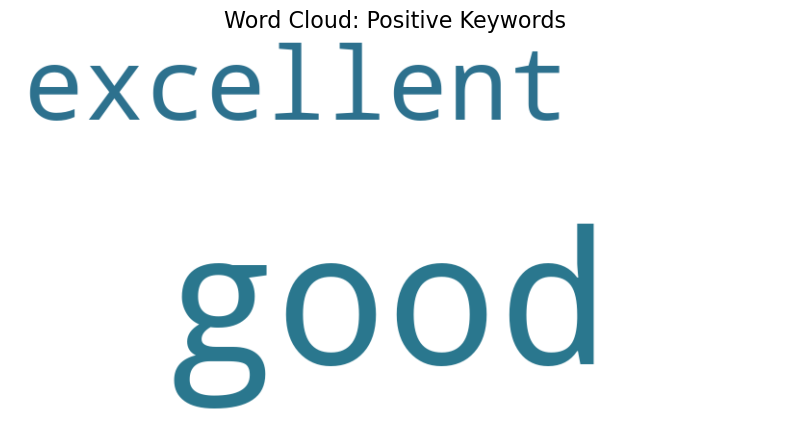

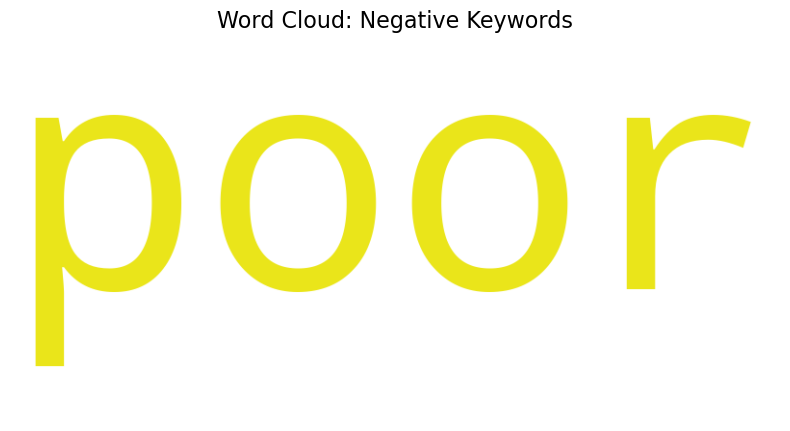

In [7]:
# Word cloud for positive keywords
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_count)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Positive Keywords', fontsize=16)
plt.show()

# Word cloud for negative keywords
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_count)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Negative Keywords', fontsize=16)
plt.show()

# Calculate the Average Length of Reviews and Explore Relationship with Rating

In [8]:
# Calculate the length of each review
if 'Review Text' in data.columns:  # Replace 'Review Text' with the actual column name for review text
    data['Review Length'] = data['Review Text'].dropna().apply(len)

    # Calculate the average review length
    avg_review_length = data['Review Length'].mean()
    print(f"The average length of reviews is {avg_review_length:.2f} characters.")

    # Explore relationship between review length and rating
    review_rating_corr = data[['Review Length', 'Aggregate rating']].corr().iloc[0, 1]
    print(f"The correlation between review length and aggregate rating is {review_rating_corr:.2f}.")
else:
    print("Review text column not available in the dataset.")

Review text column not available in the dataset.


Visualization

In [9]:
# Scatter plot for review length vs rating
if 'Review Length' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Review Length', y='Aggregate rating', data=data, alpha=0.6, color='purple')
    plt.title('Relationship Between Review Length and Rating')
    plt.xlabel('Review Length (Characters)')
    plt.ylabel('Aggregate Rating')
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.show()

# Identify the Restaurants with the Highest and Lowest Number of Votes

In [10]:
# Restaurant with the highest number of votes
most_voted_restaurant = data.loc[data['Votes'].idxmax()]
print("Restaurant with the Highest Number of Votes:")
print(f"Name: {most_voted_restaurant['Restaurant Name']}")
print(f"Votes: {most_voted_restaurant['Votes']}")
print(f"Rating: {most_voted_restaurant['Aggregate rating']}")

# Restaurant with the lowest number of votes
least_voted_restaurant = data.loc[data['Votes'].idxmin()]
print("\nRestaurant with the Lowest Number of Votes:")
print(f"Name: {least_voted_restaurant['Restaurant Name']}")
print(f"Votes: {least_voted_restaurant['Votes']}")
print(f"Rating: {least_voted_restaurant['Aggregate rating']}")

Restaurant with the Highest Number of Votes:
Name: Toit
Votes: 10934
Rating: 4.8

Restaurant with the Lowest Number of Votes:
Name: Cantinho da Gula
Votes: 0
Rating: 0.0


# Analyze if There is a Correlation Between the Number of Votes and the Rating of a Restaurant

In [11]:
# Calculate the correlation between 'Votes' and 'Aggregate rating'
votes_rating_corr = data[['Votes', 'Aggregate rating']].corr().iloc[0, 1]
print(f"The correlation between the number of votes and the aggregate rating is {votes_rating_corr:.2f}.")

The correlation between the number of votes and the aggregate rating is 0.31.


Visualization

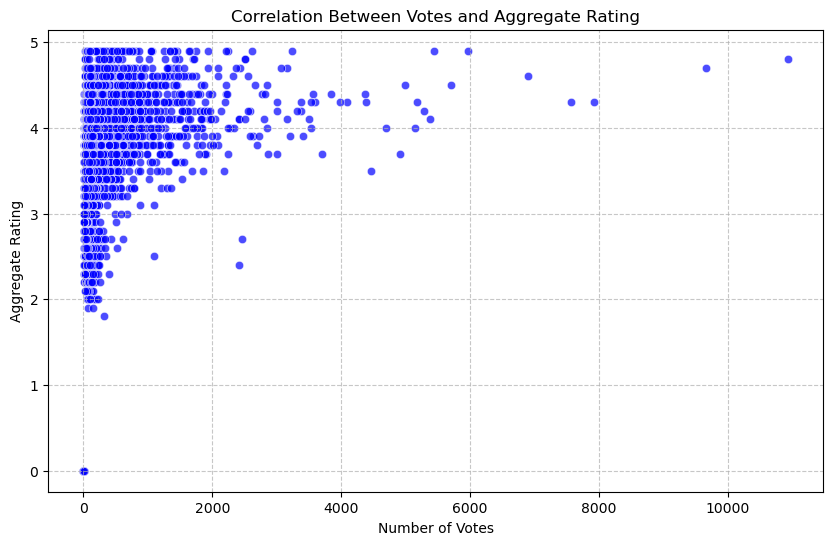

In [12]:
# Scatter plot for Votes vs Aggregate Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=data, alpha=0.7, color='blue')
plt.title('Correlation Between Votes and Aggregate Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# Analyze the Relationship Between Price Range and Availability of Online Delivery and Table Booking

In [13]:
# Group the data by 'Price range' and calculate the proportion of restaurants offering online delivery and table booking
price_range_analysis = data.groupby('Price range').agg({
    'Has Online delivery': lambda x: (x == 'Yes').mean(),
    'Has Table booking': lambda x: (x == 'Yes').mean()
}).rename(columns={
    'Has Online delivery': 'Online Delivery Availability',
    'Has Table booking': 'Table Booking Availability'
})

# Convert proportions to percentages
price_range_analysis *= 100

# Display the result
print("Availability of Online Delivery and Table Booking by Price Range (%):")
print(price_range_analysis)

Availability of Online Delivery and Table Booking by Price Range (%):
             Online Delivery Availability  Table Booking Availability
Price range                                                          
1                               15.774077                    0.022502
2                               41.310633                    7.677482
3                               29.190341                   45.738636
4                                9.044369                   46.757679


Visualization

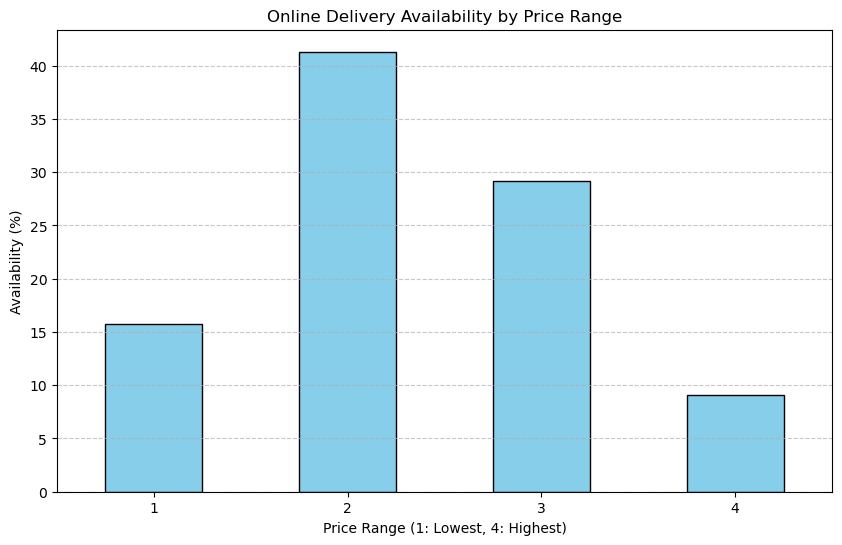

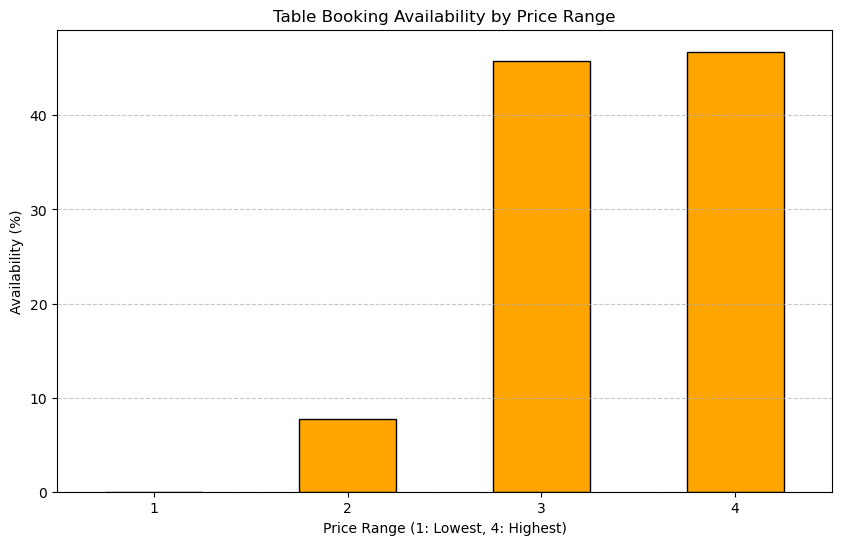

In [14]:
# Bar chart for online delivery availability by price range
plt.figure(figsize=(10, 6))
price_range_analysis['Online Delivery Availability'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range (1: Lowest, 4: Highest)')
plt.ylabel('Availability (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bar chart for table booking availability by price range
plt.figure(figsize=(10, 6))
price_range_analysis['Table Booking Availability'].plot(kind='bar', color='orange', edgecolor='black')
plt.title('Table Booking Availability by Price Range')
plt.xlabel('Price Range (1: Lowest, 4: Highest)')
plt.ylabel('Availability (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Determine if Higher-Priced Restaurants Are More Likely to Offer These Services

In [15]:
# Compare the availability of services in the highest price range (4) vs the lowest price range (1)
high_price_services = price_range_analysis.loc[4]
low_price_services = price_range_analysis.loc[1]

# Display the comparison
print("Service Availability Comparison Between Highest and Lowest Price Range:")
print(f"Online Delivery: {high_price_services['Online Delivery Availability']:.2f}% (High Price) vs "
      f"{low_price_services['Online Delivery Availability']:.2f}% (Low Price)")
print(f"Table Booking: {high_price_services['Table Booking Availability']:.2f}% (High Price) vs "
      f"{low_price_services['Table Booking Availability']:.2f}% (Low Price)")

Service Availability Comparison Between Highest and Lowest Price Range:
Online Delivery: 9.04% (High Price) vs 15.77% (Low Price)
Table Booking: 46.76% (High Price) vs 0.02% (Low Price)
